<a href="https://colab.research.google.com/github/Nkusi-Richard/COLAB-PROJECTS/blob/main/b_Code_CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries & functions





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_excel("/content/drive/MyDrive/a_Dataset_CreditScoring.xlsx")

### Data preparation

In [ ]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [ ]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [ ]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [ ]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [ ]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [ ]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [ ]:
# # count of good loans (0) and bad loans (1)
# dataset['TARGET'].value_counts()

In [ ]:
# # data summary across 0 & 1
# dataset.groupby('TARGET').mean()

### Train Test Split

(array([2500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

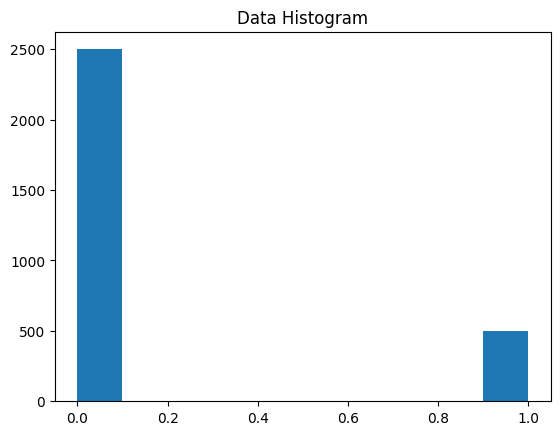

In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

from matplotlib import pyplot as plt
plt.title('Data Histogram')
plt.hist(y)
# sns.countplot(dataset['TARGET'])
# print(dataset['TARGET'])

In [ ]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

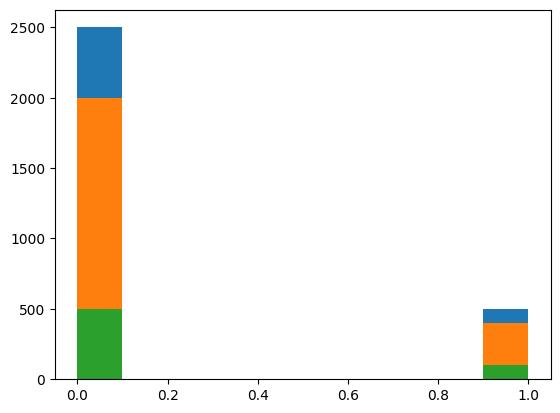

In [ ]:
plt.hist(y)
plt.hist(y_train)
plt.hist(y_test)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, '/content/drive/My Drive/f2_Normalisation_CreditScoring')

['/content/drive/My Drive/f2_Normalisation_CreditScoring']

### Risk Model building

#### Logistic Regression with class imbalance

In [ ]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#### Logistic Regression with class weighting for class imbalance

In [ ]:
classifier_LR_balanced =  LogisticRegression(class_weight='balanced')
classifier_LR_balanced.fit(X_train, y_train)
y_pred_LR_balanced = classifier_LR_balanced.predict(X_test)

#### Support Vector Machine with class imbalance

In [ ]:
classifier_SVC = SVC(random_state=0, class_weight='balanced')
classifier_SVC.fit(X_train, y_train)
y_pred_SVC = classifier_SVC.predict(X_test)

#### Random Forest classifier

In [ ]:
random_forest = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, '/content/drive/My Drive/f1_Classifier_CreditScoring')

['/content/drive/My Drive/f1_Classifier_CreditScoring']

### Model *performance*

#### Logistic Regression with class imbalance

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


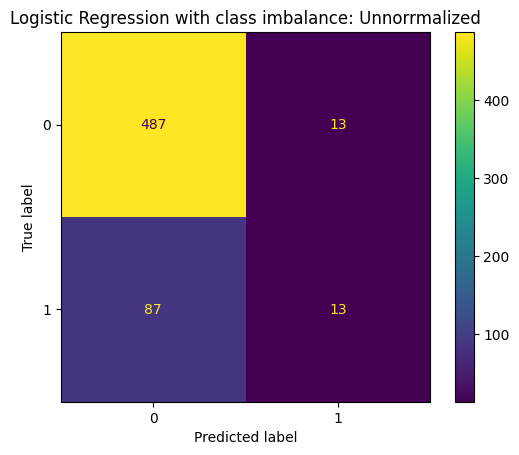

In [ ]:
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.title('Logistic Regression with class imbalance: Unnorrmalized')
plt.show()

Text(0.5, 1.0, 'Logistic Regression with class imbalance: Norrmalized')

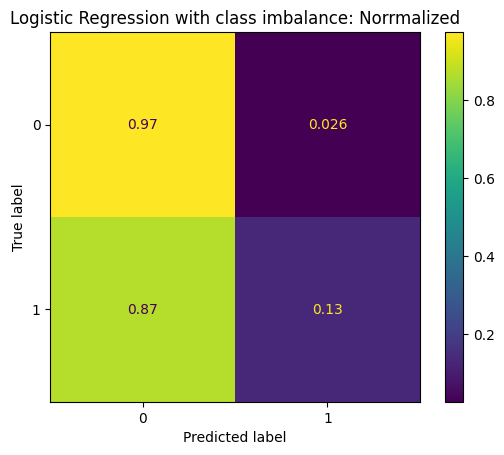

In [ ]:
display_normalized = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, normalize='true')
# display_normalized.plot()
plt.title('Logistic Regression with class imbalance: Norrmalized')


#### Logistic Regression with class imbalance

In [ ]:
cm_LR_balanced = confusion_matrix(y_test,y_pred_LR_balanced)
print(cm_LR_balanced)

[[369 131]
 [ 31  69]]


In [ ]:
print(accuracy_score(y_test, y_pred_LR_balanced))

0.73


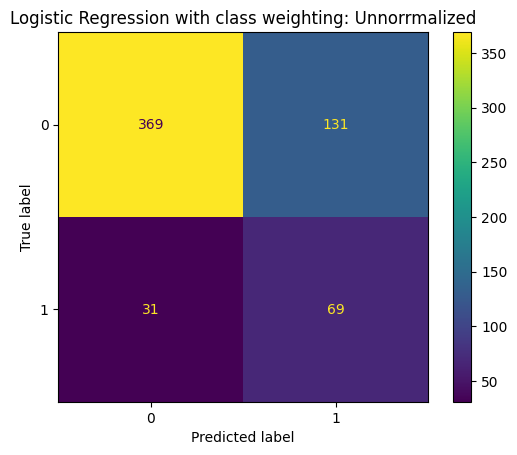

In [ ]:
display_LR_balanced = ConfusionMatrixDisplay(cm_LR_balanced)
display_LR_balanced.plot()
plt.title('Logistic Regression with class weighting: Unnorrmalized')
plt.show()

Text(0.5, 1.0, 'Logistic Regression with class weighting: Unnorrmalized: Norrmalized')

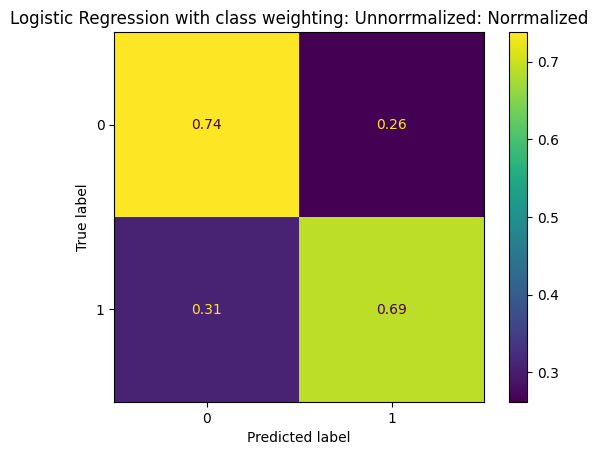

In [ ]:
display_normalized_LR_balanced = ConfusionMatrixDisplay.from_estimator(classifier_LR_balanced, X_test, y_test, normalize='true')
# display_normalized_LR_balanced.plot()
plt.title('Logistic Regression with class weighting: Unnorrmalized: Norrmalized')

#### Support Vector Machine with class imbalance

In [ ]:
cm_SVC = confusion_matrix(y_test,y_pred_SVC)
print(cm_SVC)

[[395 105]
 [ 33  67]]


In [ ]:
print(accuracy_score(y_test, y_pred_SVC))

0.77


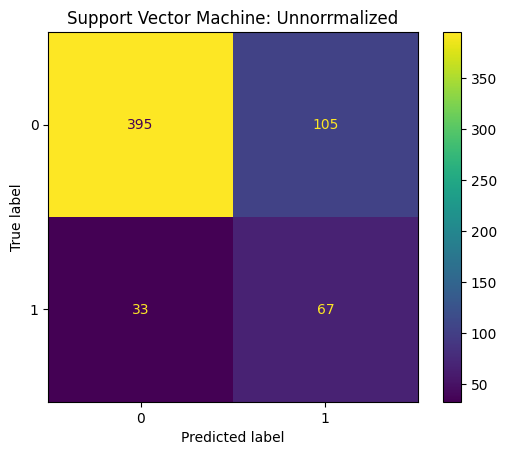

In [ ]:
cm_SVC_display = ConfusionMatrixDisplay(cm_SVC)
cm_SVC_display.plot()
plt.title('Support Vector Machine: Unnorrmalized')
plt.show()

Text(0.5, 1.0, 'Support Vector Machine: Norrmalized')

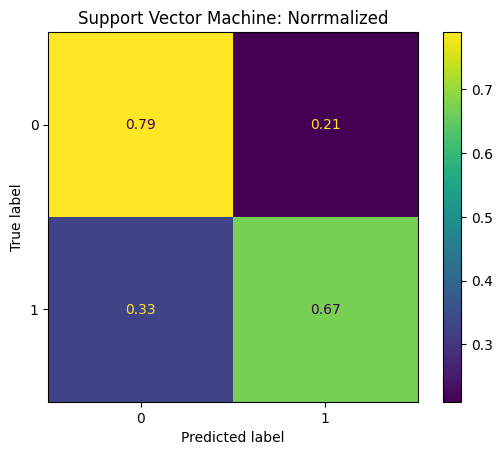

In [ ]:
display_normalized_SVC = ConfusionMatrixDisplay.from_estimator(classifier_SVC, X_test, y_test, normalize='true')
plt.title('Support Vector Machine: Norrmalized')
#display_normalized_LR_balanced.plot()
#plt.title('Norrmalized')

#### Random Forest classifier

In [ ]:
cm_random_forest = confusion_matrix(y_test,y_pred_random_forest)
print(cm_random_forest)

[[320 180]
 [ 25  75]]


In [ ]:
print(accuracy_score(y_test, y_pred_random_forest))

0.6583333333333333


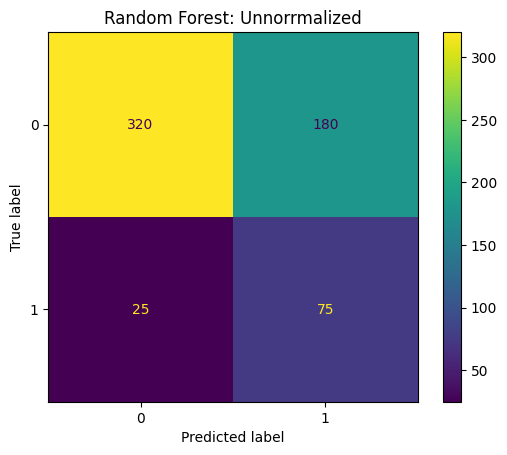

In [ ]:
cm_random_forest_display = ConfusionMatrixDisplay(cm_random_forest)
cm_random_forest_display.plot()
plt.title('Random Forest: Unnorrmalized')
plt.show()

Text(0.5, 1.0, 'Random Forest: Norrmalized')

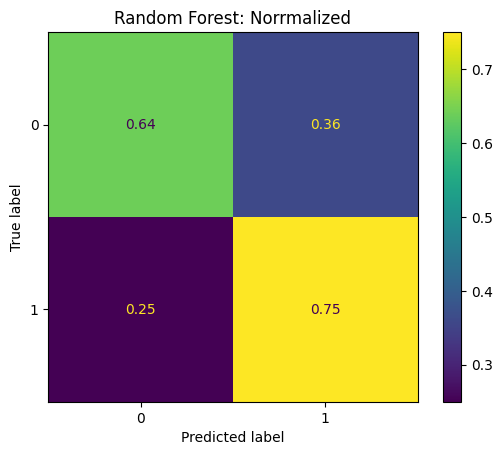

In [ ]:
display_normalized_random_forest = ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, normalize='true')
plt.title('Random Forest: Norrmalized')

### Writing output file

In [ ]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.61644691, 0.38355309],
       [0.9885656 , 0.0114344 ],
       [0.87069686, 0.12930314],
       ...,
       [0.94450568, 0.05549432],
       [0.46756903, 0.53243097],
       [0.94014209, 0.05985791]])

In [ ]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/drive/My Drive/c1_Model_Prediction.xlsx", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.616447,0.383553,0
1,0,0.988566,0.011434,0
2,1,0.870697,0.129303,0
3,0,0.953963,0.046037,0
4,1,0.726633,0.273367,0


### Coding ends here!